Nama : Shalsahbilla Nazhiifah Damayanti

NIM  : 19102243

Kelas: S1IF-07SC1

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist 
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

####WINE

In [ ]:
#import data
wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/Data/wine.csv')
wine

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [ ]:
len(wine)

178

In [ ]:
#Ambil bagian data dari dataset kolom 0-13
X = np.array(wine.iloc[:, 0:13])
print('Bagian data :')
print(X)

Bagian data :
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


Preprocessing -> Normalisasi data dengan min max scaller

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [ ]:
#Mecari jumlah K terbaik
SSE = []
K = range(1,11)
#cari yang terbaik
for k in K:
  #Buat Model K-Means
  kmeanModel = KMeans(n_clusters=k).fit(x_scaled)
  kmeanModel.fit(x_scaled)
  SSE.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

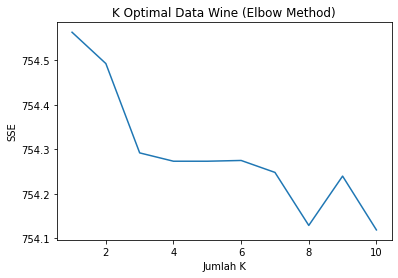

In [ ]:
#Menggambar Elbow
plt.plot(K, SSE, '-')
plt.xlabel('Jumlah K')
plt.ylabel('SSE')
plt.title('K Optimal Data Wine (Elbow Method)')
plt.show()

#elbow berada pada garis yang patah-patah atau membentuk siku di garis lurus
#pada grafik di bawa elbow ada di titik 2, 3, 4, 6, 8 

Membuat Model K-Means

In [ ]:
model = KMeans(n_clusters=3, random_state=42).fit(x_scaled)
#mencari centroid
model.cluster_centers_

array([[0.31137521, 0.23689915, 0.47291703, 0.49991686, 0.2477209 ,
        0.45305895, 0.38240098, 0.4117468 , 0.39742546, 0.14773478,
        0.47351167, 0.58897554, 0.15640099],
       [0.544689  , 0.47844053, 0.56013612, 0.53833177, 0.31146245,
        0.24476489, 0.10713464, 0.61852487, 0.22827646, 0.4826404 ,
        0.19254989, 0.16090576, 0.24739982],
       [0.70565142, 0.24842869, 0.58490401, 0.3444313 , 0.41072701,
        0.64211419, 0.55467939, 0.30034024, 0.47727155, 0.35534046,
        0.47780888, 0.69038612, 0.59389397]])

In [ ]:
#Memberi label Klaster
wine['Klaster'] = model.labels_
wine

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline,Class,Klaster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3,1


Library Sillhouette

In [ ]:
pip install -U yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.base import Visualizer

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b1a845f90>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

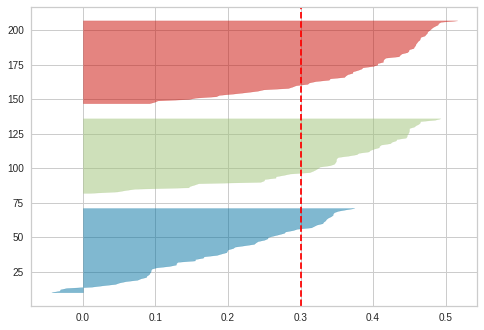

In [ ]:
kmmodel = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(kmmodel, colors='yellowbrick')
visualizer.fit(x_scaled)

####GLASS

In [ ]:
glass = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/Data/glass.csv")
glass

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
#Ambil bagian data dari dataset
Y = np.array(glass.iloc[:, 1:10]) #kolom 1-10
print('Bagian data :')
print(Y)

Bagian data :
[[ 1.52101 13.64     4.49    ...  8.75     0.       0.     ]
 [ 1.51761 13.89     3.6     ...  7.83     0.       0.     ]
 [ 1.51618 13.53     3.55    ...  7.78     0.       0.     ]
 ...
 [ 1.52065 14.36     0.      ...  8.44     1.64     0.     ]
 [ 1.51651 14.38     0.      ...  8.48     1.57     0.     ]
 [ 1.51711 14.23     0.      ...  8.62     1.67     0.     ]]


Preprocessing

In [ ]:
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(Y)
y_scaled

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [ ]:
#Mecari jumlah K terbaik
SSE = []
K = range(1,10)
#cari yang terbaik
for k in K:
  #bikin model
  kmeanModel = KMeans(n_clusters=k).fit(y_scaled)
  kmeanModel.fit(y_scaled)
  SSE.append(sum(np.min(cdist(Y, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

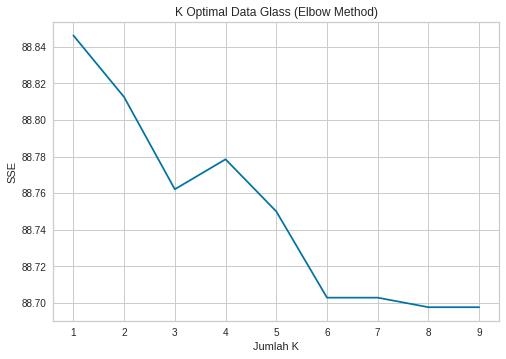

In [ ]:
#Menggambar Elbow
plt.plot(K, SSE, '-')
plt.xlabel('Jumlah K')
plt.ylabel('SSE')
plt.title('K Optimal Data Glass (Elbow Method)')
plt.show()

#elbow berada pada garis yang patah-patah atau membentuk siku di garis lurus
#pada grafik di bawa elbow ada di titik 3, 6, 8

Model K-Means

In [ ]:
model = KMeans(n_clusters=3, random_state=42).fit(y_scaled)
#mencari centroid
model.cluster_centers_

array([[0.3067336 , 0.38367347, 0.77161117, 0.31800855, 0.49805901,
        0.08044528, 0.29664158, 0.00893227, 0.11935209],
       [0.23074467, 0.55698337, 0.05945873, 0.58312093, 0.57213203,
        0.09720392, 0.28796328, 0.28417508, 0.02317291],
       [0.539223  , 0.30112782, 0.08786192, 0.32757009, 0.47482143,
        0.04847021, 0.64419145, 0.05380952, 0.19705882]])

In [ ]:
#Memberi label Klaster
glass['Klaster'] = model.labels_
glass

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class,Klaster
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,1
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,1
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,1


In [ ]:
pip install -U yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.base import Visualizer

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b1a786f10>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

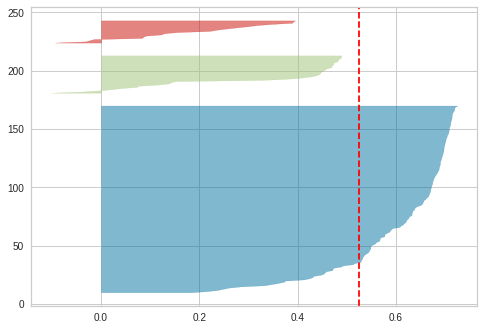

In [ ]:
kmmodel = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(kmmodel, colors='yellowbrick')
visualizer.fit(y_scaled)